In [1]:
"""
Created on: Wed. 5 Oct. 2022
Updated on: Mon. 14 Nov. 2022
Updated on: Thu. 5 Jan. 2022
Updated on: Fri. 6 Jan. 2023
Author: Mélina Verger

Test the models and return their accuracies and feature importance.
"""

# For data manipulation
import pandas as pd

# To load the trained models
import pickle

# For cross-validation
from sklearn.model_selection import cross_val_score

# Metric
from sklearn.metrics import accuracy_score

# Plotting module
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load data sets and trained models

In [2]:
DATA = pickle.load(open("../data/DATA", "rb"))
SPLIT = pickle.load(open("../data/SPLIT", "rb"))

print(DATA)
print(SPLIT)

stInfo
7030


In [3]:
# Load train and test sets

X_train = pd.read_csv("../data/X_train" + "_" + DATA + "_" + SPLIT + ".csv")
X_test = pd.read_csv("../data/X_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_train = pd.read_csv("../data/y_train" + "_" + DATA + "_" + SPLIT + ".csv")
y_test = pd.read_csv("../data/y_test" + "_" + DATA + "_" + SPLIT + ".csv")
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [4]:
# Load trained models

MODELS = pickle.load(open("../data/MODELS", "rb"))  # dict with names and trained models
models = MODELS

## Accuracies on train and test sets

In [5]:
NB_FOLD = 5

In [6]:
for mod_name in models:
    print(f"----- Model: {mod_name} -----")
    scores_train = cross_val_score(models[mod_name], X_train, y_train, cv=NB_FOLD)
    print("Accuracy on the train set with cross-validation: \n - %0.2f with a standard deviation of %0.2f" % (scores_train.mean(), scores_train.std()))
    print(f"Accuracy on the test set: \n - {round(accuracy_score(y_test, models[mod_name].predict(X_test)), 2)}")
    

----- Model: clf_lr -----
Accuracy on the train set with cross-validation: 
 - 0.69 with a standard deviation of 0.01
Accuracy on the test set: 
 - 0.68
----- Model: clf_kn -----
Accuracy on the train set with cross-validation: 
 - 0.65 with a standard deviation of 0.01
Accuracy on the test set: 
 - 0.65
----- Model: clf_dt -----
Accuracy on the train set with cross-validation: 
 - 0.67 with a standard deviation of 0.01
Accuracy on the test set: 
 - 0.66
----- Model: clf_rf -----
Accuracy on the train set with cross-validation: 
 - 0.67 with a standard deviation of 0.01
Accuracy on the test set: 
 - 0.67
----- Model: clf_svc -----
Accuracy on the train set with cross-validation: 
 - 0.69 with a standard deviation of 0.01
Accuracy on the test set: 
 - 0.68
----- Model: clf_cnb -----
Accuracy on the train set with cross-validation: 
 - 0.59 with a standard deviation of 0.03
Accuracy on the test set: 
 - 0.6
----- Model: clf_mnb -----
Accuracy on the train set with cross-validation: 
 - 0

## (Optional) Feature importance (FI)

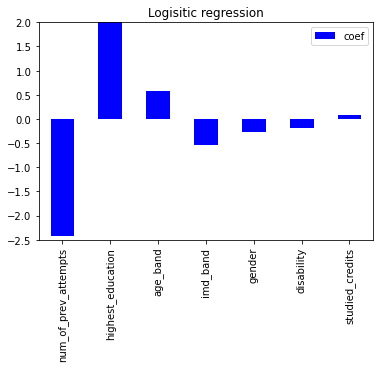

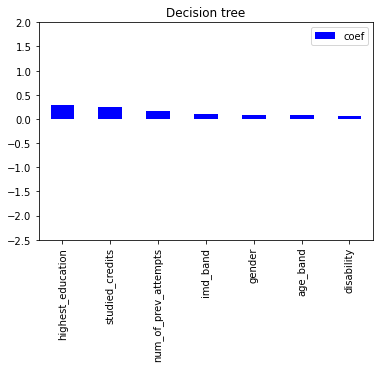

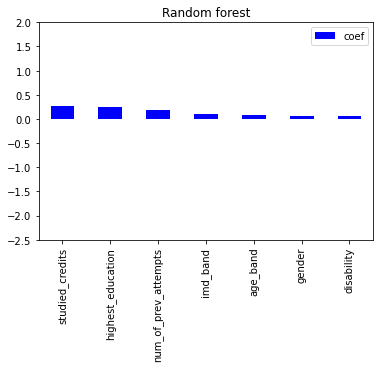

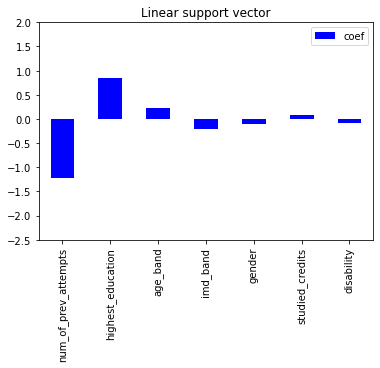



clf_cnb has no feature importance outputs.


clf_mnb has no feature importance outputs.


In [7]:
for mod_name in models:
    if mod_name != "clf_kn":  # no FI for KN

        if mod_name == "clf_lr":
            pd.DataFrame(models[mod_name].coef_, columns=X_train.columns,
                        index=["coef"]).T.sort_values(by='coef',
                        axis=0, ascending=False, key=abs).plot.bar(color='b')
            if DATA == "stInfo":
                plt.ylim((-2.5,2))
            elif DATA == "stAll":
                plt.ylim((-2.5,9.5))
            plt.title("Logisitic regression")
        
        elif mod_name == "clf_dt":
            pd.DataFrame(models[mod_name].feature_importances_, index=X_train.columns,
                         columns=["coef"]).sort_values(by='coef', axis=0, ascending=False,
                         key=abs).plot.bar(color='b')
            if DATA == "stInfo":
                plt.ylim((-2.5,2))
            elif DATA == "stAll":
                plt.ylim((-2.5,9.5))
            plt.title("Decision tree")
        
        elif mod_name == "clf_rf":
            pd.DataFrame(models[mod_name].feature_importances_, index=X_train.columns,
                         columns=["coef"]).sort_values(by='coef', axis=0, ascending=False,
                         key=abs).plot.bar(color='b')
            if DATA == "stInfo":
                plt.ylim((-2.5,2))
            elif DATA == "stAll":
                plt.ylim((-2.5,9.5))
            plt.title("Random forest")
        
        elif mod_name == "clf_svc":
            pd.DataFrame(models[mod_name].coef_, columns=X_train.columns,
                         index=["coef"]).T.sort_values(by='coef',
                         axis=0, ascending=False, key=abs).plot.bar(color='b')
            if DATA == "stInfo":
                plt.ylim((-2.5,2))
            elif DATA == "stAll":
                plt.ylim((-2.5,9.5))
            plt.title("Linear support vector")
        
        else:
            print("\n")
            print(f"{mod_name} has no feature importance outputs.")

        plt.show()